In [15]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from bisect import bisect_right
from copy import deepcopy
import seaborn as sns
import os
from zipfile import ZipFile

In [16]:
sns.set()

In [17]:
def load_pkl(fp):
    with open(fp, 'rb') as file:
        result = pickle.load(file)
    return result

In [18]:
def weird_load(fp):
    container = {}
    n = 0
    with open(fp, 'rb') as file:
        while True:
            chunk = file.read(2064)
            if not chunk:
                break
            try:
                data = pickle.loads(chunk)
                container.update(data)
            except:
                file.seek(-2064, 1)
                probe = file.read(10)
                while probe != b'\x80\x04\x95\x05\x08\x00\x00\x00\x00\x00':
                    file.seek(-9, 1)
                    probe = file.read(10)
                file.seek(-10, 1)
    return container

In [19]:
def to_case(result, mode=1):
    outcome = defaultdict(list)
    if mode == 1:
        for area in result.keys():
            case_n = area.split('.zip', 1)[0]
            outcome[case_n].append(area)
    else:
        for area in result.keys():
            case_n = area.rsplit('/', 2)[-2]
            outcome[case_n].append(area)
    return outcome

In [20]:
def profile_count(case_dict):
    outcome = {}
    for case_n, areas in case_dict.items():
        count = len(areas)
        outcome[case_n] = count
    return outcome

In [21]:
def profile_threshold(case_dict, result, threshold=0.99, threshes=np.arange(0.96, 1.00, 0.01)):
    outcome = defaultdict(list)
    thresh_num_temp = {thresh:defaultdict(int) for thresh in threshes}
    for case_n, areas in case_dict.items():
        for area in areas:
            p = result[area]
            idx = bisect_right(threshes, p)-1
            if idx >= 0:
                loc = threshes[idx]
                thresh_num_temp[loc][case_n] += 1
            if p >= threshold:
                outcome[case_n].append(area)
                
    return outcome, thresh_num_temp

In [22]:
def refine_thresh_num_temp(thresh_num_temp, threshes, case_dict):
    thresh_num = deepcopy(thresh_num_temp)
    cases = case_dict.keys()
    threshes = threshes[::-1]
    for idx, thresh in enumerate(threshes[1:], 1):
        pre_thresh = threshes[idx-1]
        for case_n in cases:
            thresh_num[thresh][case_n] += thresh_num[pre_thresh][case_n]
    return thresh_num

In [23]:
def population_plot(thresh_num):
    x, y_min, y_max = [], [], []
    for thresh, counts in thresh_num.items():
        vals = counts.values()
        x.append(thresh)
        y_min.append(min(vals))
        y_max.append(max(vals))
    plt.figure()
    sns.lineplot(x=x, y=y_min, label='min count')
    sns.lineplot(x=x, y=y_max, label='max count')
    plt.ylabel('number')
    plt.xlabel('threshold')

In [24]:
a = weird_load('outcome_plus - Copy (3).pkl')
b = weird_load('outcome_plus - Copy (4).pkl')
c = weird_load('outcome_plus.pkl')

In [25]:
a.update(b)
a.update(c)
result = a
case_dict = to_case(result)

In [26]:
case_count = profile_count(case_dict)

In [27]:
threshes = np.arange(0.95, 1.00, 0.01)
selected_area, thresh_num_temp = profile_threshold(case_dict, result, threshes=threshes)

In [28]:
thresh_num = refine_thresh_num_temp(thresh_num_temp, threshes, case_dict)

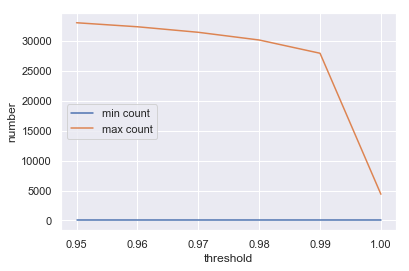

In [29]:
population_plot(thresh_num)

In [30]:
cur_dst = '../../selected'
def done(dst=cur_dst):
    return set(os.listdir(cur_dst))

In [33]:
def extract(dir_p, selected_area):
    cur_done = done(cur_dst)
    n = 0
    for case, areas in selected_area.items():
        if case in cur_done:
            continue
        dst = f'{cur_dst}/{case}'
        os.makedirs(dst)
        with ZipFile(os.path.join(dir_p, f'{case}.zip'), 'r') as temp_zip:
            for area in areas:
                file = area[-25:]
                temp_zip.extract(file, path=dst)
        n += 1
        print(f'{n:03}{case} is done')

In [ ]:
extract('j:/archive/', selected_area)

001TCGA-B6-A0IC-01Z-00-DX1 is done
002TCGA-B6-A0IE-01Z-00-DX1 is done
003TCGA-B6-A0IH-01Z-00-DX1 is done
004TCGA-B6-A0IJ-01Z-00-DX1 is done
005TCGA-B6-A0IK-01Z-00-DX1 is done
006TCGA-B6-A0IM-01Z-00-DX1 is done
007TCGA-B6-A0IN-01Z-00-DX1 is done
008TCGA-B6-A0IO-01Z-00-DX1 is done
009TCGA-B6-A0IP-01Z-00-DX1 is done
010TCGA-B6-A0IQ-01Z-00-DX1 is done
011TCGA-B6-A0RE-01Z-00-DX1 is done
012TCGA-B6-A0RG-01Z-00-DX1 is done
013TCGA-B6-A0RH-01Z-00-DX1 is done
014TCGA-B6-A0RI-01Z-00-DX1 is done
015TCGA-B6-A0RN-01Z-00-DX1 is done
016TCGA-B6-A0RO-01Z-00-DX1 is done
017TCGA-B6-A0RQ-01Z-00-DX1 is done
018TCGA-B6-A0RS-01Z-00-DX1 is done
019TCGA-B6-A0RT-01Z-00-DX1 is done
020TCGA-B6-A0RU-01Z-00-DX1 is done
021TCGA-B6-A0RV-01Z-00-DX1 is done
022TCGA-B6-A0WS-01Z-00-DX1 is done
023TCGA-B6-A0WT-01Z-00-DX1 is done
024TCGA-B6-A0WV-01Z-00-DX1 is done
025TCGA-B6-A0WW-01Z-00-DX1 is done
026TCGA-B6-A0WX-01Z-00-DX1 is done
027TCGA-B6-A0WY-01Z-00-DX1 is done
028TCGA-B6-A0WZ-01Z-00-DX1 is done
029TCGA-B6-A0X0-01Z-

236TCGA-D8-A1X6-01Z-00-DX1 is done
237TCGA-D8-A1X6-01Z-00-DX2 is done
238TCGA-D8-A1X7-01Z-00-DX2 is done
239TCGA-D8-A1X8-01Z-00-DX1 is done
240TCGA-D8-A1X9-01Z-00-DX1 is done
241TCGA-D8-A1XA-01Z-00-DX1 is done
242TCGA-D8-A1XB-01Z-00-DX1 is done
243TCGA-D8-A1XB-01Z-00-DX2 is done
244TCGA-D8-A1XC-01Z-00-DX1 is done
245TCGA-D8-A1XC-01Z-00-DX2 is done
246TCGA-D8-A1XD-01Z-00-DX1 is done
247TCGA-D8-A1XF-01Z-00-DX1 is done
248TCGA-D8-A1XF-01Z-00-DX2 is done
249TCGA-D8-A1XG-01Z-00-DX1 is done
250TCGA-D8-A1XJ-01Z-00-DX1 is done
251TCGA-D8-A1XK-01Z-00-DX1 is done
252TCGA-D8-A1XL-01Z-00-DX1 is done
253TCGA-D8-A1XL-01Z-00-DX2 is done
254TCGA-D8-A1XM-01Z-00-DX1 is done
255TCGA-D8-A1XR-01Z-00-DX1 is done
256TCGA-D8-A1XR-01Z-00-DX2 is done
257TCGA-D8-A1XT-01Z-00-DX1 is done
258TCGA-D8-A1XU-01Z-00-DX1 is done
259TCGA-D8-A1XV-01Z-00-DX1 is done
260TCGA-D8-A1XV-01Z-00-DX2 is done
261TCGA-D8-A1XW-01Z-00-DX1 is done
262TCGA-D8-A1XW-01Z-00-DX2 is done
263TCGA-D8-A1XY-01Z-00-DX1 is done
264TCGA-D8-A1XY-01Z-

In [ ]:
def download_fps(selected_area):
    with open('selected_area.txt', 'w+') as command:
        suffix = ';'
        line = f'mkdir ../download{suffix}'
        command.write(line)
        for case_n, areas in selected_area.items():
            case_p = f'../download/{case_n}'
            line = f'mkdir {case_p}{suffix}'
            command.write(line)
            for area in areas:
                line = f'mv {area} {case_p}/{suffix}'
                command.write(line)

In [ ]:
download_fps(selected_area)